

# DT Signals

## 2.1 DT Signals

What are signals?
* Currents, voltages, currents, movement, etc.
* Mathematically: functions of one or more independent variables
* In this class, just discrete time ($n$)


Discrete Time vs. Continuous Time
* Essentially all signal processing is now discrete time
* Discrete-time usually means continuous-valued
* Digital means discrete in time and value

Signals and Systems
* Course is about both signals and systems
    * Many ideas apply to both
    * Discrete vs. continuous

### Discrete-time Signals
$x = {x[n]} \text{ } -\infty < n < \infty$
    
where 
* $n$ is an integer
* No units attributed to $n$
* If you need units, typically we use the word ``samples''

Often is sampled from continuous-time signal $x(t)$

$x[n] = x(nT)  -\infty < n < \infty$

How to sketch discrete time signals
* Stem plots
* Vertical bars
* Linearly interpolated signals



### Unit Sample
$\delta[n] = 
    \begin{cases}
        0 & n \neq 0 \\
        1 & n = 0 
    \end{cases}$

* Unlike continuous-time, no problems mathematically
* Well defined
* Simple and precise
* Can decompose any signal into a sequence of shifted unit impulses

$x[n] = \sum_{k=-\infty}^{\infty} x[k] \delta[n-k]$

### Unit Step
$u[n] = 
    \begin{cases}
        0 & n < 0 \\
        1 & n \geq 0 
    \end{cases}$

### Exponential Sequence

$x[n] = A \alpha^n 
    = |A| e^{j\theta} |\alpha|^n e^{j\omega n}
    = |A| |\alpha|^{n} \cos(\omega n + \phi) + j |A| |\alpha|^{n} \sin(\omega n + \phi)$

Turns out to be very important

Eigensignals of LTI systems (more later)
* Units of $\omega$ are a bit odd
    * Radians
    * Radians per sample
    * $\phi$ is called the phase

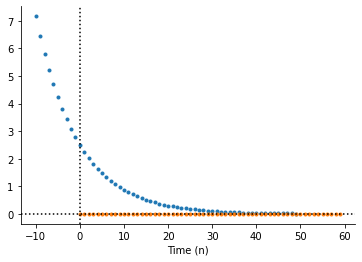

In [17]:
import matplotlib.pyplot as plt
import numpy as np

A     = 2.5
alpha = 0.9

figure = plt.figure()
axes = figure.gca() #add_subplot(111, projection='3d')

n = np.arange(-10,50)
x = A * (alpha**n)
axes.plot(n,x.real,x.imag,marker='.',linestyle='None')
axes.axhline(0,linestyle=':',color='k')
axes.axvline(0,linestyle=':',color='k')
axes.set_xlabel('Time (n)')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
plt.show()


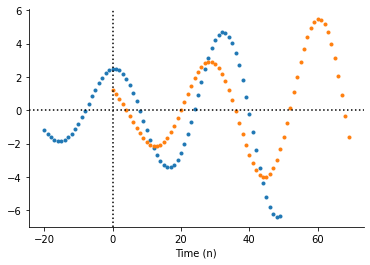

In [18]:
A     = 2.5
alpha = 1.0+0.2j

n = np.arange(-20,50)
x = A * (alpha**n)

figure = plt.figure()
axes = figure.gca()
axes.plot(n,x.real,x.imag,marker='.',linestyle='None')
axes.axhline(0,linestyle=':',color='k')
axes.axvline(0,linestyle=':',color='k')
axes.set_xlabel('Time (n)')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
plt.show()

### Complex Sinusoids

$x[n] = A e^{j \omega n} = |A| e^{j \omega n + \phi} = |A| \cos(\omega n + \phi) + j |A| \sin(\omega n + \phi)$

Unlike the CT case, $n$ is always an integer. Has some non-intuitive consequences

$x[n] = A e^{j(\omega+2\pi)n} = A e^{j\omega n}e^{2 \pi n}  = A e^{j\omega n}$

* Frequencies that are $2\pi r$ apart (where $r$ is an integer) are indistinguishable!
* Cause of aliasing
* Changes what we mean by high and low frequency
* Typically only look at frequencies in range of $-\pi < \omega < \pi$
* Frequencies near $\pi$ are considered high frequency


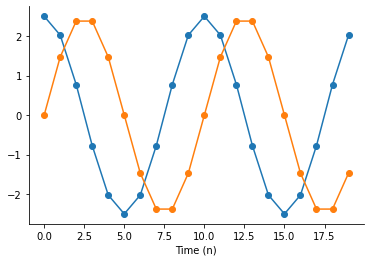

In [19]:
A     = 2.5
omega = 0.2*np.pi

n = np.arange(20)
x = A * np.exp(1j*n*omega)

figure = plt.figure()
axes = figure.gca() #add_subplot(111, projection='3d')
axes.plot(n,x.real,x.imag,marker='.',markersize=12)
axes.set_xlabel('Time (n)')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
plt.show()

#axes2 = plt.axes(projection='3d')


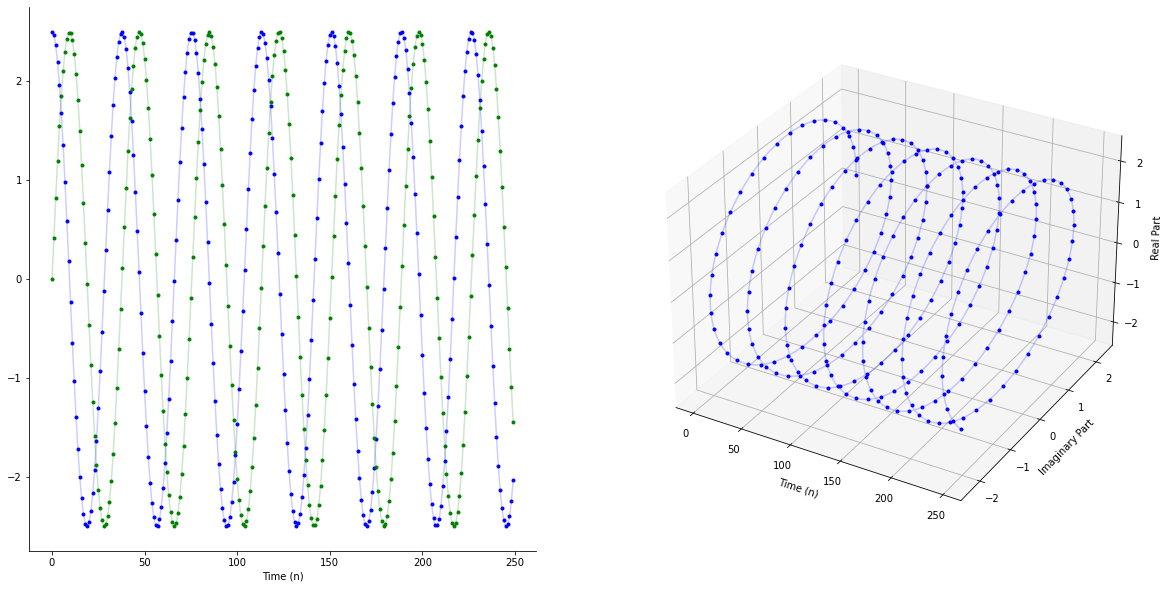

In [20]:
from mpl_toolkits import mplot3d

A     = 2.5
omega = 0.053*np.pi #+ 2.0*np.pi

n = np.arange(250)
x = A * np.exp(1j*n*omega)

t = np.linspace(0,n[-1],1000)
xt = A * np.exp(1j*t*omega)

figure = plt.figure()
figure.clf()
#fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
figure.set_size_inches(20,10)
axes = figure.add_subplot(121)
axes.plot(n,x.real,marker='.',linestyle='none',color='b')
axes.plot(n,x.imag,marker='.',linestyle='none',color='g')
axes.plot(t,xt.real,color='b',alpha=0.2)
axes.plot(t,xt.imag,color='g',alpha=0.2)
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_xlabel('Time (n)')

axes = figure.add_subplot(122, projection='3d')
axes.plot3D(n,x.real,x.imag,color='b',marker='.',linestyle='none')
axes.plot3D(t,xt.real,xt.imag,color='b',alpha=0.2)
axes.set_xlabel('Time (n)')
axes.set_ylabel('Imaginary Part')
axes.set_zlabel('Real Part')
axes.set_ylim([-A,A])
axes.set_zlim([-A,A])
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
plt.show()

### DT Periodic Signals

$x[n] = x[n + N]  \text{ for all } n$

where the period $N$ is an integer.
* Causes some unexpected results
* However, just an artifact of the definition